In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, precision_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV


import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

In [2]:
wine_df = pd.read_csv("../data/winequality-red.csv")
wine_df['quality_label'] = wine_df.quality.apply(lambda x: 1 if x >= 7 else 0)

In [3]:
X = wine_df.loc[:, 'fixed acidity': 'alcohol']
y = wine_df['quality_label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Hyperparameters for Neural Networks

- hidden_layer_sizes - accespts tuples, the length of the tuple represents the number of hidden layers while the numeric value represents the number of nodes for each hidden layer. Example (13,13,13) means that you have 3 hidden layers with 13 nodes for each layer.
- alpha - regularization parameter, larger alpha values would reduce weights greatly while smaller values reduce the weights a bit
- learning_rate - algorithm used to adjust the learning rate, constant keeps using the same learning rate throughout the training while adapative keeps the learning rate constant while loss keeps decreasing. If loss does not decrease for 2 iterations the learning rate is divided by 5
- learning_rate_init - the initial learning rate to use which controls the step size in changing the weights

## Stopping Criterions

- max_iter - # of iterations to run the training
- tol - When the loss or score is not improving by at least the tol value convergence is considered to be reached and training stops.

In [5]:
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [6]:
y_pred = mlp.predict(X_test)
print(f"Acc:{mlp.score(X_test, y_test)}")
print(f"Precision:{precision_score(y_test, y_pred)}")
print(f"Recall:{recall_score(y_test, y_pred)}")
print(f"F1-Score:{f1_score(y_test, y_pred)}")

Acc:0.853125
Precision:0.5
Recall:0.14893617021276595
F1-Score:0.22950819672131148


### Hyperparameter Optimization

In [7]:
param_grid = {
    'hidden_layer_sizes': [(50,), (13,13,13), (13,10,5),(50,50,50),(25,25,25,25,25)],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    'learning_rate_init': [0.01, 0.00001, 0.1]
}
mlp = MLPClassifier()
clf = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50,), (13, 13, 13),
                                                (13, 10, 5), (50, 50, 50),
                                                (25, 25, 25, 25, 25)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.01, 1e-05, 0.1]})

In [8]:
clf.best_estimator_

MLPClassifier(hidden_layer_sizes=(13, 13, 13), learning_rate_init=0.01)

In [9]:
best_clf = clf.best_estimator_
y_pred = best_clf.predict(X_test)
print(f"Acc:{best_clf.score(X_test, y_test)}")
print(f"Precision:{precision_score(y_test, y_pred)}")
print(f"Recall:{recall_score(y_test, y_pred)}")
print(f"F1-Score:{f1_score(y_test, y_pred)}")

Acc:0.865625
Precision:0.7
Recall:0.14893617021276595
F1-Score:0.24561403508771928


In [10]:
result_df = pd.DataFrame.from_dict(clf.cv_results_, orient='columns')
result_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,param_learning_rate,param_learning_rate_init,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.316754,0.089485,0.002992,6.305249e-04,0.0001,"(50,)",constant,0.01,"{'alpha': 0.0001, 'hidden_layer_sizes': (50,),...",0.859375,0.882812,0.839844,0.875000,0.874510,0.866308,0.015255,32
1,0.801856,0.016118,0.003591,1.196170e-03,0.0001,"(50,)",constant,0.00001,"{'alpha': 0.0001, 'hidden_layer_sizes': (50,),...",0.863281,0.859375,0.132812,0.730469,0.866667,0.690521,0.283556,52
2,0.315357,0.146585,0.002594,4.888893e-04,0.0001,"(50,)",constant,0.1,"{'alpha': 0.0001, 'hidden_layer_sizes': (50,),...",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,13
3,0.312364,0.061990,0.003192,3.991372e-04,0.0001,"(50,)",adaptive,0.01,"{'alpha': 0.0001, 'hidden_layer_sizes': (50,),...",0.867188,0.871094,0.867188,0.867188,0.878431,0.870218,0.004377,10
4,0.783504,0.019386,0.003192,3.987314e-04,0.0001,"(50,)",adaptive,0.00001,"{'alpha': 0.0001, 'hidden_layer_sizes': (50,),...",0.855469,0.863281,0.867188,0.140625,0.866667,0.718646,0.289041,50
5,0.239360,0.059148,0.002792,3.987556e-04,0.0001,"(50,)",adaptive,0.1,"{'alpha': 0.0001, 'hidden_layer_sizes': (50,),...",0.878906,0.875000,0.867188,0.867188,0.866667,0.870990,0.005027,7
6,0.411698,0.088948,0.002594,4.881498e-04,0.0001,"(13, 13, 13)",constant,0.01,"{'alpha': 0.0001, 'hidden_layer_sizes': (13, 1...",0.863281,0.890625,0.855469,0.871094,0.901961,0.876486,0.017286,1
7,1.044606,0.015015,0.003192,3.987321e-04,0.0001,"(13, 13, 13)",constant,0.00001,"{'alpha': 0.0001, 'hidden_layer_sizes': (13, 1...",0.132812,0.867188,0.132812,0.867188,0.149020,0.429804,0.357171,59
8,0.232378,0.108289,0.002594,4.882275e-04,0.0001,"(13, 13, 13)",constant,0.1,"{'alpha': 0.0001, 'hidden_layer_sizes': (13, 1...",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,13
9,0.366818,0.135853,0.002394,4.879939e-04,0.0001,"(13, 13, 13)",adaptive,0.01,"{'alpha': 0.0001, 'hidden_layer_sizes': (13, 1...",0.867188,0.875000,0.855469,0.867188,0.854902,0.863949,0.007705,43


In [11]:
result_df.groupby('param_hidden_layer_sizes').mean_test_score.max()

param_hidden_layer_sizes
(13, 10, 5)             0.874896
(13, 13, 13)            0.876486
(25, 25, 25, 25, 25)    0.870993
(50,)                   0.874905
(50, 50, 50)            0.870996
Name: mean_test_score, dtype: float64

(0.4, 1.0)

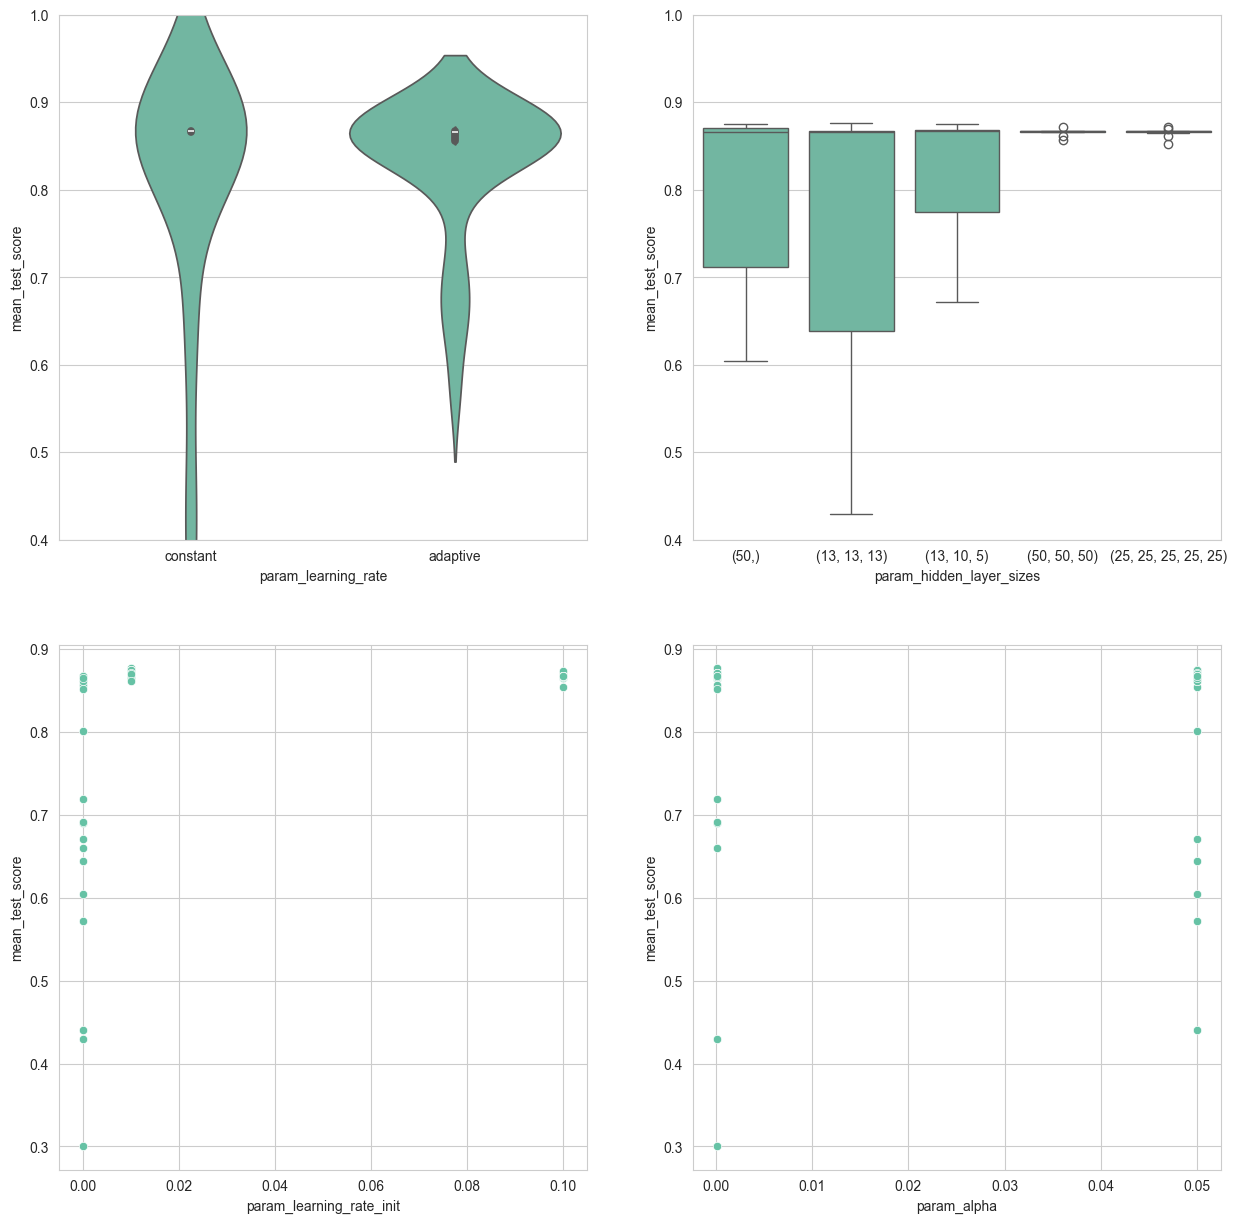

In [24]:
fig, axes = plt.subplots(figsize=(15,15), nrows=2, ncols=2)
sns.violinplot(data=result_df, x='param_learning_rate', y='mean_test_score', ax=axes[0][0])

# Convert to string bcuz of error thinking tuple is multi-index
sns.boxplot(x=result_df['param_hidden_layer_sizes'].astype('string'), 
            y=result_df['mean_test_score'], 
            ax=axes[0][1])
sns.scatterplot(data=result_df, x='param_learning_rate_init', y='mean_test_score', ax=axes[1][0])
sns.scatterplot(data=result_df, x='param_alpha', y='mean_test_score', ax=axes[1][1])

axes[0][0].set_ylim(0.4,1)
axes[0][1].set_ylim(0.4,1)

## Model Explainability using SHAP

PermutationExplainer explainer: 321it [00:21,  9.56it/s]                                                               


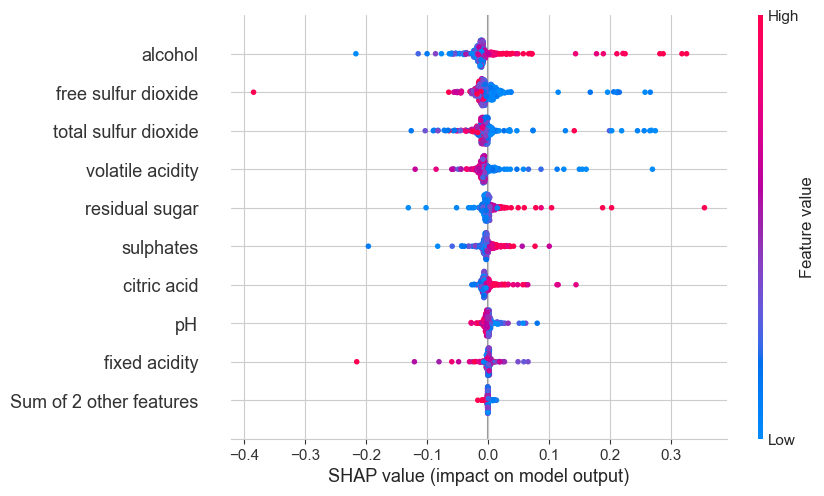

In [25]:
import shap
shap.initjs()

explainer = shap.Explainer(best_clf.predict, X_train)
shap_values = explainer(X_test)
shap.plots.beeswarm(shap_values)


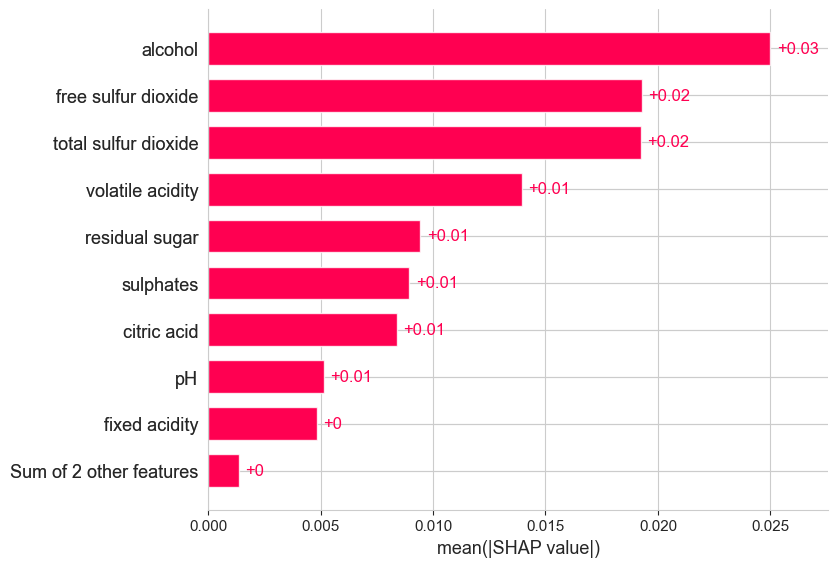

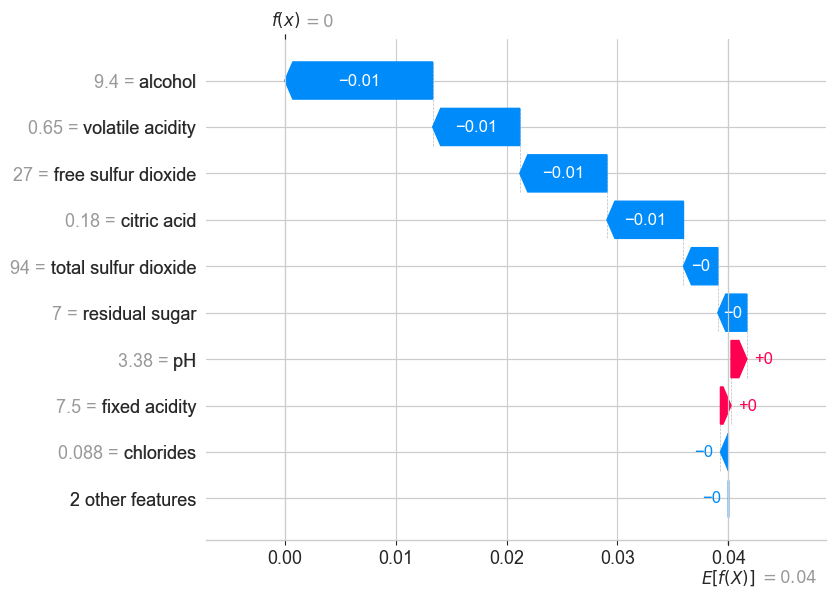

In [26]:
# Our group wanted to share additional code, if it's alright.

# feature importance
shap.plots.bar(shap_values.abs.mean(0))

# explanation for random single sample
import numpy as np

rng = np.random.default_rng(seed=42)
random_idx = rng.integers(low=0, high=X_test.shape[0])

shap.plots.waterfall(shap.Explanation(
    base_values=shap_values[0][0].base_values,
    values=shap_values[0].values,
    feature_names=X_test.columns,
    data=X_test.iloc[random_idx]
))
